In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv('results/n_reruns_algo.csv')

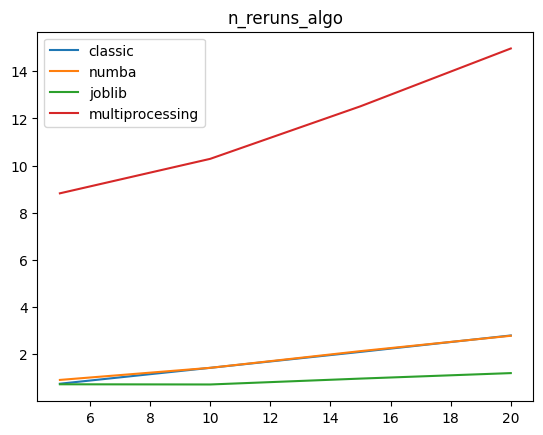

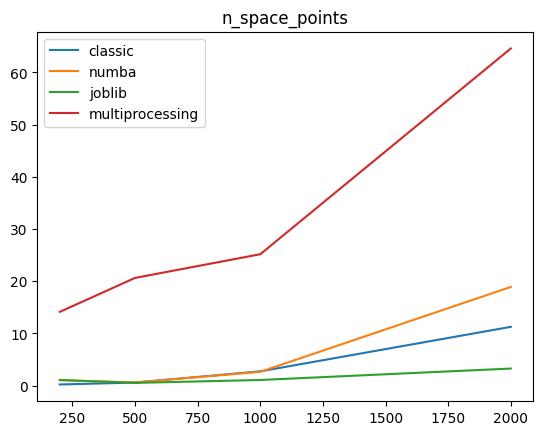

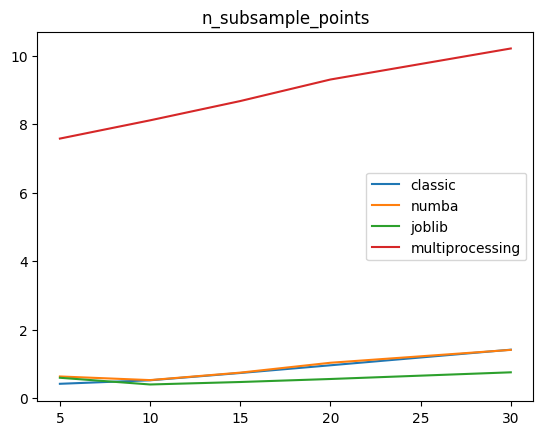

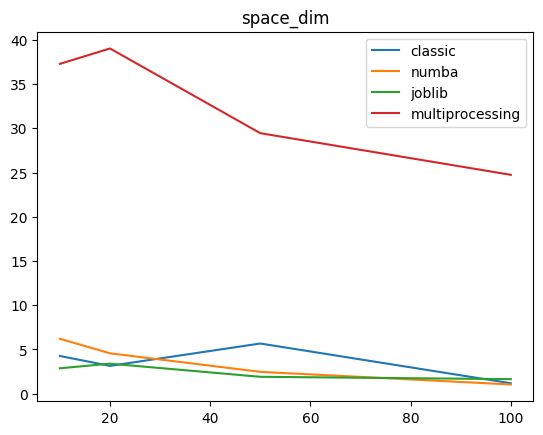

In [14]:
for param in ['n_reruns_algo', 'n_space_points', 'n_subsample_points', 'space_dim']:
    results = pd.read_csv(f'results/{param}.csv')
    for method in results['method'].unique():
        cur_df = results[results['method'] == method]
        plt.plot(cur_df[param], cur_df['time_mean'], label=method)

    plt.title(param)
    plt.legend()
    plt.show()